In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
#import urllib2
import folium
import json
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import scipy
import scipy.stats as sp
import scipy.optimize as op
import statsmodels.api as sm
from scipy.stats import linregress
from scipy.optimize import curve_fit
from scipy import stats


from datetime import datetime, date, timedelta
from matplotlib.backends.backend_pdf import PdfPages
#from matplotlib.pyplot import cm 
import platform
import sys
import glob
from io import StringIO
import matplotlib as mpl
import matplotlib.cm as cm

import pyproj
from pyproj import Proj
import simplekml

#import matplotlib
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import wellapplication as wa

In [3]:
print("Operating System " + platform.system() + " " + platform.release())
print("Python Version " + str(sys.version))
print("Pandas Version " + str(pd.__version__))
print("Numpy Version " + str(np.__version__))
print("Matplotlib Version " + str(mpl.__version__))
print("Well Application Version " + str(wa.__version__))
print("Scipy Version " +str(scipy.__version__))

Operating System Windows 10
Python Version 3.6.2 |Continuum Analytics, Inc.| (default, Jul 20 2017, 12:30:02) [MSC v.1900 64 bit (AMD64)]
Pandas Version 0.22.0
Numpy Version 1.13.3
Matplotlib Version 2.0.2
Well Application Version 0.5.4
Scipy Version 0.19.1


In [4]:
import arcpy
arcpy.CheckOutExtension("spatial")
from arcpy import env 
from arcpy.sa import *

In [5]:
engineroute = "G:/My Drive/WORK/Round_Valley/Data/"

sys.path.append(engineroute)
import enginegetter

In [6]:
engine = enginegetter.getEngine()

# Massage Rasters

In [ ]:
arcpy.env.workspace = r"E:\GIS\SSEBOP\yearlyETa"
arcpy.env.mask = r"E:\GIS\SSEBOP_ET_yr.gdb\UTHUCS"
proj = arcpy.SpatialReference(102039)
for rast in arcpy.ListRasters("*.tif"):
    out2 = arcpy.Raster(rast)/1000.0
    out = arcpy.sa.ExtractByMask(out2,r"E:\GIS\SSEBOP_ET_yr.gdb\UTHUCS")
    
    arcpy.ProjectRaster_management(out,"E:/GIS/SSEBOP_ET_yr.gdb/"+rast[:-4], 
                                   proj, "BILINEAR", 250,"#","#","#")
    print(rast[:-4])

In [ ]:
arcpy.env.workspace = "E:/GIS/PRISM_raw/PRISM"
arcpy.env.overwriteOutput = True
arcpy.env.mask = r"E:\GIS\SSEBOP_ET_yr.gdb\UTHUCS"

proj = arcpy.SpatialReference(102039)
for rast in arcpy.ListRasters("*.bil"):

    out = arcpy.sa.ExtractByMask(rast,r"E:\GIS\SSEBOP_ET_yr.gdb\UTHUCS")
    
    arcpy.ProjectRaster_management(out,"E:/GIS/PRISM_raw/PRISM_RAW.gdb/P"+rast[-14:-8], 
                                   proj, "BILINEAR", 250,"#","#","#")
    print(rast[-14:-8])



In [ ]:

    out = arcpy.Raster(rast) / 100.0
    out.save("E:/GIS/PRISM_raw/PRISM.gdb/"+rast)
    print("E:/GIS/PRISM_raw/PRISM.gdb/"+rast)

In [ ]:
arcpy.env.workspace = "E:/GIS/MODIS16.gdb"
arcpy.env.overwriteOutput = True
arcpy.CheckOutExtension("Spatial")

#USA_Contiguous_Albers_Equal_Area_Conic_USGS_version
#WKID: 102039 Authority: Esri

outCS = arcpy.SpatialReference(102039)
for rast in arcpy.ListRasters('PET*'):
    arcpy.ProjectRaster_management(rast, "E:/GIS/MODIS16_RESAMP.gdb/"+rast,outCS, "BILINEAR", "250","#", "#", "#")
    print(rast)

In [ ]:
arcpy.env.workspace = "E:/GIS/SSEBOP_ET_mon.gdb"
arcpy.env.overwriteOutput = True

for year in range(2001,2016):
    yrlist = []
    for rast in arcpy.ListRasters():
        if rast[2:6] == str(year):
            yrlist.append(rast)
    print(yrlist)
    out = arcpy.sa.CellStatistics(yrlist,"SUM","DATA")
    outname = "E:/GIS/SSEBOP_ET_yr.gdb/ET"+str(year) 
    print(outname)
    out.save(outname)


# Zonal Statistics

## Round Valley UBM Processing

In [7]:
from time import sleep

# doing stuff
sleep(10800.0) 


arcpy.env.overwriteOutput = True
# Set environment settings
# results 5 allows for negative soil water
arcpy.env.workspace = "E:/PROJECTS/Round_Valley/UBM/UBM_results5.gdb"

# Set local variables
inZoneData = {"E:/PROJECTS/Round_Valley/UBM_Zonal.gdb/GeoZones":["name","geo"],
              "E:/PROJECTS/Round_Valley/UBM_Zonal.gdb/HUC_Zones":["HUC_12","huc"]}

zoneField = "Permanent_Identifier"
# zonal4 allows for negative soil water
for rast in arcpy.ListRasters():
    for key,value in inZoneData.items():
        outTable = "E:/PROJECTS/Round_Valley/UBM_Zonal4.gdb/{:}_{:}".format(value[1],rast)
        outZSaT = ZonalStatisticsAsTable(key, value[0], rast, outTable, "DATA", "MEAN")
        print(rast, value)

rec200101 ['name', 'geo']
rec200101 ['HUC_12', 'huc']
run200101 ['name', 'geo']
run200101 ['HUC_12', 'huc']
aet200101 ['name', 'geo']
aet200101 ['HUC_12', 'huc']
asw200101 ['name', 'geo']
asw200101 ['HUC_12', 'huc']
rec200102 ['name', 'geo']
rec200102 ['HUC_12', 'huc']
run200102 ['name', 'geo']
run200102 ['HUC_12', 'huc']
aet200102 ['name', 'geo']
aet200102 ['HUC_12', 'huc']
asw200102 ['name', 'geo']
asw200102 ['HUC_12', 'huc']
rec200103 ['name', 'geo']
rec200103 ['HUC_12', 'huc']
run200103 ['name', 'geo']
run200103 ['HUC_12', 'huc']
aet200103 ['name', 'geo']
aet200103 ['HUC_12', 'huc']
asw200103 ['name', 'geo']
asw200103 ['HUC_12', 'huc']
rec200104 ['name', 'geo']
rec200104 ['HUC_12', 'huc']
run200104 ['name', 'geo']
run200104 ['HUC_12', 'huc']
aet200104 ['name', 'geo']
aet200104 ['HUC_12', 'huc']
asw200104 ['name', 'geo']
asw200104 ['HUC_12', 'huc']
rec200105 ['name', 'geo']
rec200105 ['HUC_12', 'huc']
run200105 ['name', 'geo']
run200105 ['HUC_12', 'huc']
aet200105 ['name', 'geo']
ae

rec200403 ['name', 'geo']
rec200403 ['HUC_12', 'huc']
run200403 ['name', 'geo']
run200403 ['HUC_12', 'huc']
aet200403 ['name', 'geo']
aet200403 ['HUC_12', 'huc']
asw200403 ['name', 'geo']
asw200403 ['HUC_12', 'huc']
rec200404 ['name', 'geo']
rec200404 ['HUC_12', 'huc']
run200404 ['name', 'geo']
run200404 ['HUC_12', 'huc']
aet200404 ['name', 'geo']
aet200404 ['HUC_12', 'huc']
asw200404 ['name', 'geo']
asw200404 ['HUC_12', 'huc']
rec200405 ['name', 'geo']
rec200405 ['HUC_12', 'huc']
run200405 ['name', 'geo']
run200405 ['HUC_12', 'huc']
aet200405 ['name', 'geo']
aet200405 ['HUC_12', 'huc']
asw200405 ['name', 'geo']
asw200405 ['HUC_12', 'huc']
rec200406 ['name', 'geo']
rec200406 ['HUC_12', 'huc']
run200406 ['name', 'geo']
run200406 ['HUC_12', 'huc']
aet200406 ['name', 'geo']
aet200406 ['HUC_12', 'huc']
asw200406 ['name', 'geo']
asw200406 ['HUC_12', 'huc']
rec200407 ['name', 'geo']
rec200407 ['HUC_12', 'huc']
run200407 ['name', 'geo']
run200407 ['HUC_12', 'huc']
aet200407 ['name', 'geo']
ae

rec200705 ['name', 'geo']
rec200705 ['HUC_12', 'huc']
run200705 ['name', 'geo']
run200705 ['HUC_12', 'huc']
aet200705 ['name', 'geo']
aet200705 ['HUC_12', 'huc']
asw200705 ['name', 'geo']
asw200705 ['HUC_12', 'huc']
rec200706 ['name', 'geo']
rec200706 ['HUC_12', 'huc']
run200706 ['name', 'geo']
run200706 ['HUC_12', 'huc']
aet200706 ['name', 'geo']
aet200706 ['HUC_12', 'huc']
asw200706 ['name', 'geo']
asw200706 ['HUC_12', 'huc']
rec200707 ['name', 'geo']
rec200707 ['HUC_12', 'huc']
run200707 ['name', 'geo']
run200707 ['HUC_12', 'huc']
aet200707 ['name', 'geo']
aet200707 ['HUC_12', 'huc']
asw200707 ['name', 'geo']
asw200707 ['HUC_12', 'huc']
rec200708 ['name', 'geo']
rec200708 ['HUC_12', 'huc']
run200708 ['name', 'geo']
run200708 ['HUC_12', 'huc']
aet200708 ['name', 'geo']
aet200708 ['HUC_12', 'huc']
asw200708 ['name', 'geo']
asw200708 ['HUC_12', 'huc']
rec200709 ['name', 'geo']
rec200709 ['HUC_12', 'huc']
run200709 ['name', 'geo']
run200709 ['HUC_12', 'huc']
aet200709 ['name', 'geo']
ae

rec201007 ['name', 'geo']
rec201007 ['HUC_12', 'huc']
run201007 ['name', 'geo']
run201007 ['HUC_12', 'huc']
aet201007 ['name', 'geo']
aet201007 ['HUC_12', 'huc']
asw201007 ['name', 'geo']
asw201007 ['HUC_12', 'huc']
rec201008 ['name', 'geo']
rec201008 ['HUC_12', 'huc']
run201008 ['name', 'geo']
run201008 ['HUC_12', 'huc']
aet201008 ['name', 'geo']
aet201008 ['HUC_12', 'huc']
asw201008 ['name', 'geo']
asw201008 ['HUC_12', 'huc']
rec201009 ['name', 'geo']
rec201009 ['HUC_12', 'huc']
run201009 ['name', 'geo']
run201009 ['HUC_12', 'huc']
aet201009 ['name', 'geo']
aet201009 ['HUC_12', 'huc']
asw201009 ['name', 'geo']
asw201009 ['HUC_12', 'huc']
rec201010 ['name', 'geo']
rec201010 ['HUC_12', 'huc']
run201010 ['name', 'geo']
run201010 ['HUC_12', 'huc']
aet201010 ['name', 'geo']
aet201010 ['HUC_12', 'huc']
asw201010 ['name', 'geo']
asw201010 ['HUC_12', 'huc']
rec201011 ['name', 'geo']
rec201011 ['HUC_12', 'huc']
run201011 ['name', 'geo']
run201011 ['HUC_12', 'huc']
aet201011 ['name', 'geo']
ae

rec201309 ['name', 'geo']
rec201309 ['HUC_12', 'huc']
run201309 ['name', 'geo']
run201309 ['HUC_12', 'huc']
aet201309 ['name', 'geo']
aet201309 ['HUC_12', 'huc']
asw201309 ['name', 'geo']
asw201309 ['HUC_12', 'huc']
rec201310 ['name', 'geo']
rec201310 ['HUC_12', 'huc']
run201310 ['name', 'geo']
run201310 ['HUC_12', 'huc']
aet201310 ['name', 'geo']
aet201310 ['HUC_12', 'huc']
asw201310 ['name', 'geo']
asw201310 ['HUC_12', 'huc']
rec201311 ['name', 'geo']
rec201311 ['HUC_12', 'huc']
run201311 ['name', 'geo']
run201311 ['HUC_12', 'huc']
aet201311 ['name', 'geo']
aet201311 ['HUC_12', 'huc']
asw201311 ['name', 'geo']
asw201311 ['HUC_12', 'huc']
rec201312 ['name', 'geo']
rec201312 ['HUC_12', 'huc']
run201312 ['name', 'geo']
run201312 ['HUC_12', 'huc']
aet201312 ['name', 'geo']
aet201312 ['HUC_12', 'huc']
asw201312 ['name', 'geo']
asw201312 ['HUC_12', 'huc']
rec201401 ['name', 'geo']
rec201401 ['HUC_12', 'huc']
run201401 ['name', 'geo']
run201401 ['HUC_12', 'huc']
aet201401 ['name', 'geo']
ae

rec201611 ['name', 'geo']
rec201611 ['HUC_12', 'huc']
run201611 ['name', 'geo']
run201611 ['HUC_12', 'huc']
aet201611 ['name', 'geo']
aet201611 ['HUC_12', 'huc']
asw201611 ['name', 'geo']
asw201611 ['HUC_12', 'huc']
rec201612 ['name', 'geo']
rec201612 ['HUC_12', 'huc']
run201612 ['name', 'geo']
run201612 ['HUC_12', 'huc']
aet201612 ['name', 'geo']
aet201612 ['HUC_12', 'huc']
asw201612 ['name', 'geo']
asw201612 ['HUC_12', 'huc']
rec201701 ['name', 'geo']
rec201701 ['HUC_12', 'huc']
run201701 ['name', 'geo']
run201701 ['HUC_12', 'huc']
aet201701 ['name', 'geo']
aet201701 ['HUC_12', 'huc']
asw201701 ['name', 'geo']
asw201701 ['HUC_12', 'huc']
rec201702 ['name', 'geo']
rec201702 ['HUC_12', 'huc']
run201702 ['name', 'geo']
run201702 ['HUC_12', 'huc']
aet201702 ['name', 'geo']
aet201702 ['HUC_12', 'huc']
asw201702 ['name', 'geo']
asw201702 ['HUC_12', 'huc']
rec201703 ['name', 'geo']
rec201703 ['HUC_12', 'huc']
run201703 ['name', 'geo']
run201703 ['HUC_12', 'huc']
aet201703 ['name', 'geo']
ae

In [8]:
def calcvols(searchStr='*', stat='MEAN', mult = 1.0):
    tables = arcpy.ListTables(searchStr)    
    f = {}
    for table in tables:
        fields = arcpy.ListFields(table)
        #for table in prism_tables:
        fieldlist = [field.name for field in fields]
        f[table] = pd.DataFrame(arcpy.da.TableToNumPyArray(table,fieldlist))
    g = pd.concat(f)
    g.reset_index(inplace=True)

    g['raster_name'] = g['level_0'].apply(lambda x: str(x),1)
    g['datav'] = g['level_0'].apply(lambda x: str(x)[:3],1)
    g['YearMonth'] = g['level_0'].apply(lambda x: str(x)[-6:],1)
    g['Year'] = g['level_0'].apply(lambda x: str(x)[-6:-2],1)
    g['Month'] = g['level_0'].apply(lambda x: str(x)[-2:],1)

    g.drop(['level_0','level_1','OBJECTID','ZONE_CODE'],axis=1,inplace=True)
    g['SOURCE'] = "UBM"

    g['volume_m_cubed'] = g[[stat,'AREA']].apply(lambda x: round(x[0]*x[1]*mult,0),1)
    g['volume_acft'] = g['volume_m_cubed'].apply(lambda x: round(x*0.000810714,0),1)

    g['date'] = g.apply(lambda x: pd.to_datetime(x.YearMonth,errors='coerce',format='%Y%m'),1)
    return g
# zonal4 allows for negative soil water
arcpy.env.workspace ="E:/PROJECTS/Round_Valley/UBM_Zonal4.gdb"
# rv 8 includes soil water that can be negative
tabname = 'roundvalley9'
zones = ['geo','huc']
datasets = ['aet','asw','rec','run']
for zone in zones:
    for data in datasets:
        g = calcvols(searchStr='{:}_{:}*'.format(zone,data))
        if "HUC_12" in g.columns:
            g.rename(columns={"HUC_12":"name"},inplace=True)
        g.to_sql(con=engine, name=tabname, if_exists='append', index=False)
        print(zone, data)

geo aet
geo asw
geo rec
geo run
huc aet
huc asw
huc rec
huc run


In [9]:
def calcvols(searchStr='*', stat='MEAN', mult = 0.001):
    tables = arcpy.ListTables(searchStr)    
    f = {}
    for table in tables:
        fields = arcpy.ListFields(table)
        #for table in prism_tables:
        fieldlist = [field.name for field in fields]
        f[table] = pd.DataFrame(arcpy.da.TableToNumPyArray(table,fieldlist))
    g = pd.concat(f)
    g.reset_index(inplace=True)

    g['raster_name'] = g['level_0'].apply(lambda x: str(x),1)
    g['datav'] = g['level_0'].apply(lambda x: str(x)[:1],1)
    g['YearMonth'] = g['level_0'].apply(lambda x: str(x)[-6:],1)
    g['Year'] = g['level_0'].apply(lambda x: str(x)[-6:-2],1)
    g['Month'] = g['level_0'].apply(lambda x: str(x)[-2:],1)

    g.drop(['level_0','level_1','OBJECTID','ZONE_CODE'],axis=1,inplace=True)
    g['SOURCE'] = "PRISM"

    g['volume_m_cubed'] = g[[stat,'AREA']].apply(lambda x: round(x[0]*x[1]*mult,0),1)
    g['volume_acft'] = g['volume_m_cubed'].apply(lambda x: round(x*0.000810714,0),1)

    g['date'] = g.apply(lambda x: pd.to_datetime(x.YearMonth,errors='coerce',format='%Y%m'),1)
    return g




arcpy.env.workspace ="E:/PROJECTS/Round_Valley/UBM_Zonal3.gdb"
tabname = 'roundvalley9'
zones = ['geo','huc']
datasets = ['aet','asw','rec','run']
for zone in zones:
    g = calcvols(searchStr='{:}_P*'.format(zone))
    if "HUC_12" in g.columns:
        g.rename(columns={"HUC_12":"name"},inplace=True)
    g.to_sql(con=engine, name=tabname, if_exists='append', index=False)
    print(zone, data)

geo run
huc run


## Older Processing

In [ ]:
def zone_gdb(indata, z_Name, Zonal_HUCS, Zone_field, wildcard='*'):
    arcpy.env.workspace = indata
    arcpy.CheckOutExtension("Spatial")


    for rast in arcpy.ListRasters(wildcard):
        dsc = arcpy.Describe(rast)
        nm = dsc.baseName
        arcpy.sa.ZonalStatisticsAsTable(Zonal_HUCS, Zone_field, rast, z_Name + "z_" + nm, "DATA", "MEAN")
        print("z_" + nm)
       
    
#Zonal_HUCS = "U:\\GWP\\Groundwater\\Projects\\BCM\\Data\\Calc.gdb\\Zonal_HUCS"
    
#z_Name = "U:\\GWP\\Groundwater\\Projects\\BCM\\Data\\Zonal2.gdb\\"
Zonal_HUCS = "E:/PROJECTS/Round_Valley/Round_Valley.gdb/Valley_Zones"
Zone_field = "AreaName"
z_Name = "E:/PROJECTS/Round_Valley/Zonal.gdb/"

In [ ]:
def zone_gdbsb(indata, z_Name, Zonal_HUCS, Zone_field, wildcard='*'):
    arcpy.env.workspace = indata
    arcpy.CheckOutExtension("Spatial")


    for rast in arcpy.ListRasters(wildcard):
        dsc = arcpy.Describe(rast)
        nm = dsc.baseName
        arcpy.sa.ZonalStatisticsAsTable(Zonal_HUCS, Zone_field, rast, z_Name + "z_SB" + nm, "DATA", "MEAN")
        print("z_SB" + nm)

In [ ]:
indata = "E:/GIS/SSEBOP_ET_mon.gdb"
zone_gdbsb(indata,z_Name,Zonal_HUCS,Zone_field)

In [ ]:
indata = "E:/GIS/PRISM_RESAMP.gdb"
zone_gdb(indata,z_Name,Zonal_HUCS,Zone_field)

In [ ]:
indata = "E:/GIS/PRISM_raw/PRISM_RAW.gdb"
zone_gdb(indata,z_Name,Zonal_HUCS,Zone_field)

In [ ]:
indata = "H:/GIS/SIR2010_5193_BCM.gdb"
zone_gdb(indata)

indata = "H:/GIS/Soil.gdb"
zone_gdb(indata)

In [ ]:
indata = 'H:/GIS/SNODAS.gdb'
zone_gdb(indata, 'RAIN20*')

In [ ]:
indata = 'H:/GIS/AvailableWater3.gdb'
zone_gdb(indata)

# Store Zonal Data in Database

In [ ]:
def calcvols(searchStr,source,variable, stat='MEAN', mult = 1.0):
    tables = arcpy.ListTables(searchStr)
    fields = arcpy.ListFields(tables[0])
    #for table in prism_tables:
    fieldlist = [field.name for field in fields]

    f = {}
    for table in tables:
        f[table] = pd.DataFrame(arcpy.da.TableToNumPyArray(table,fieldlist))
    g = pd.concat(f)
    g.reset_index(inplace=True)
    
    
    g['raster_name'] = g['level_0'].apply(lambda x: str(x)[2:],1)
    g['datav'] = g['level_0'].apply(lambda x: str(x)[2:-6],1)
    g['YearMonth'] = g['level_0'].apply(lambda x: str(x)[-6:],1)
    g['Year'] = g['level_0'].apply(lambda x: str(x)[-6:-2],1)
    g['Month'] = g['level_0'].apply(lambda x: str(x)[-2:],1)
    
    #g['HUC_10'] = g['HUC_12'].apply(lambda x: str(x)[:-2],1)
    #g['HUC_08'] = g['HUC_12'].apply(lambda x: str(x)[:-4],1)
    g.drop(['level_0','level_1','OBJECTID','ZONE_CODE'],axis=1,inplace=True)
    g['SOURCE'] = source
    g['variable'] = variable
    g['volume_m_cubed'] = g[stat]*g['AREA']* mult
    g['volume_acft'] = g['volume_m_cubed']*0.000810714
    
    if g['SOURCE'] == "PRISM":
        
    #g = g[(~g.YearMonth.str.contains('yr'))]
    #g['dt'] = pd.to_datetime(g.YearMonth,errors='coerce',format='%Y%m')
    return g

In [ ]:
def calcvols(source, searchStr='z_*', stat='MEAN', mult = 1.0):
    tables = arcpy.ListTables(searchStr)
    fields = arcpy.ListFields(tables[0])
    #for table in prism_tables:
    fieldlist = [field.name for field in fields]

    f = {}
    for table in tables:
        f[table] = pd.DataFrame(arcpy.da.TableToNumPyArray(table,fieldlist))
    g = pd.concat(f)
    g.reset_index(inplace=True)

    g['raster_name'] = g['level_0'].apply(lambda x: str(x)[2:],1)
    g['datav'] = g['level_0'].apply(lambda x: str(x)[2:-6],1)
    g['YearMonth'] = g['level_0'].apply(lambda x: str(x)[-6:],1)
    g['Year'] = g['level_0'].apply(lambda x: str(x)[-6:-2],1)
    g['Month'] = g['level_0'].apply(lambda x: str(x)[-2:],1)
    #g['HUC10'] = g['HUC12'].apply(lambda x: str(x)[:-2],1)
    #g['HUC08'] = g['HUC12'].apply(lambda x: str(x)[:-4],1)
    g.drop(['level_0','level_1','OBJECTID','ZONE_CODE'],axis=1,inplace=True)
    g['SOURCE'] = source


    if source == 'PRISM':
        mult = 0.001
    g['volume_m_cubed'] = g[[stat,'AREA']].apply(lambda x: round(x[0]*x[1]*mult,0),1)
    g['volume_acft'] = g['volume_m_cubed'].apply(lambda x: round(x*0.000810714,0),1)
    #g = g[(~g.YearMonth.str.contains('yr'))]
    #g['dt'] = pd.to_datetime(g.YearMonth,errors='coerce',format='%Y%m')
    return g

In [ ]:
arcpy.env.workspace ="E:/PROJECTS/Round_Valley/Zonal.gdb"
tabname = 'roundvalley2'

tdicts = {'ET':'MODIS','SBET':'SSEBOP','P':'PRISM'}
g = {}

for key,value in tdicts.items():
    g[key] = calcvols(value, searchStr="z_{:}*".format(key))
    g[key].to_sql(con=engine, name=tabname, if_exists='append', index=False)

In [ ]:
z_Name = "E:/PROJECTS/Round_Valley/Zonal.gdb/"

In [ ]:
#tabplace = 'U:/GWP/Groundwater/Projects/BCM/Data/Zonal.gdb'
tabplace = "H:/GIS/Zonal2.gdb/"
outfold = 'M:/PROJECTS/UBM/'

tabname = 'bdgt'
arcpy.env.workspace = tabplace

## UBM

In [ ]:
g = calcvols('z_run*','UBM','runoff')
g.to_sql(con=engine, name=tabname, if_exists='append', index=False)

In [ ]:
g = calcvols('z_rec*','UBM','recharge')
g.to_sql(con=engine, name=tabname, if_exists='append', index=False)

## PRISM

In [ ]:
g = calcvols('z_a*','PRISM','precipitation')
g.to_sql(con=engine, name=tabname, if_exists='append', index=False)

## MODIS16

In [ ]:
g = calcvols('z_ET*','MODIS16','evapotranspiration')
g.to_sql(con=engine, name = tabname, if_exists='append', index=False)

In [ ]:
g = calcvols('z_PET*','MODIS16','evapotranspiration')
g.to_sql(con=engine, name = tabname, if_exists='append', index=False)

## BCM

In [ ]:
g = calcvols('z_sir20105193_rch*','BCM','recharge', mult=0.000001)
g.to_sql(con=engine, name = tabname, if_exists='append', index=False)

g = calcvols('z_sir20105193_run*','BCM','runoff', mult=0.000001)
g.to_sql(con=engine, name = tabname, if_exists='append', index=False)

## Soil Properties

In [ ]:
g = calcvols('z_porosity*','Surrgo','porosity')
g.to_sql(con=engine, name=tabname, if_exists='append', index=False)

g = calcvols('z_fieldC*','Surrgo','field capacity')
g.to_sql(con=engine, name = tabname, if_exists='append', index=False)

g = calcvols('z_Wilt*','Surrgo','wilting point')
g.to_sql(con=engine, name = tabname, if_exists='append', index=False)

g = calcvols('z_Tsoi*','Surrgo','total soil moisture')
g.to_sql(con=engine, name = tabname, if_exists='append', index=False)

g = calcvols('z_Geo*','State Geologic Maps','conductivity')
g.to_sql(con=engine, name = tabname, if_exists='append', index=False)

## SNODAS

In [ ]:
g = calcvols('*_SNML*','SNODAS','snowmelt')
g.to_sql(con=engine, name = tabname, if_exists='append', index=False)

In [ ]:
g = calcvols('*_RAIN*','SNODAS','precip as rain')
g.to_sql(con=engine, name = tabname, if_exists='append', index=False)

In [ ]:
g = calcvols('*_SNOW*','SNODAS','precip as snow')
g.to_sql(con=engine, name = tabname, if_exists='append', index=False)

g = calcvols('*_TPPT*','SNODAS','total precip')
g.to_sql(con=engine, name = tabname, if_exists='append', index=False)

g = calcvols('*_TSSB*','SNODAS','total snow sublimation')
g.to_sql(con=engine, name = tabname, if_exists='append', index=False)

g = calcvols('*_SWEQ*','SNODAS','snow water equivalent')
g.to_sql(con=engine, name = tabname, if_exists='append', index=False)

# Query Database and Analyze Data

## Compare UBM with BCM

In [ ]:
quer = "SELECT HUC_12, volume_acft FROM ubm.zbudgetadd WHERE SOURCE = 'BCM' AND variable IN('runoff')"
BCMrun = pd.read_sql_query(sql=quer,con=engine)
BCMrun.rename(columns={'volume_acft':'BCM_run_acft'},inplace=True)

quer = "SELECT HUC_12, volume_acft FROM ubm.zbudgetadd WHERE SOURCE = 'BCM' AND variable IN('recharge')"
BCMrec = pd.read_sql_query(sql=quer,con=engine)
BCMrec.rename(columns={'volume_acft':'BCM_rec_acft'},inplace=True)

BCMrun.set_index(['HUC_12'],inplace=True)
BCMrec.set_index(['HUC_12'],inplace=True)

BCM = pd.concat([BCMrun,BCMrec],axis=1)

In [ ]:
quer = "SELECT HUC_12,YearMonth,volume_acft FROM ubm.zbudgetadd WHERE SOURCE = 'UBM' AND variable IN('runoff')"
UBM = pd.read_sql_query(sql=quer,con=engine)

UBM['dt'] = pd.to_datetime(UBM.YearMonth,errors='coerce',format='%Y%m')
UBM['year'] = UBM['dt'].apply(lambda x: x.year,1)
UBMyrly = UBM.groupby(['HUC_12','year']).sum()
UBMyrly.reset_index(inplace=True)
UBMavgrun = UBMyrly.groupby('HUC_12').mean()
UBMavgrun.drop(['year'], axis=1, inplace=True)
UBMavgrun.rename(columns={'volume_acft':'UBM_run_acft'},inplace=True)

quer = "SELECT HUC_12,YearMonth,volume_acft FROM ubm.zbudgetadd WHERE SOURCE = 'UBM' AND variable IN('recharge')"
UBM = pd.read_sql_query(sql=quer,con=engine)

UBM['dt'] = pd.to_datetime(UBM.YearMonth,errors='coerce',format='%Y%m')
UBM['year'] = UBM['dt'].apply(lambda x: x.year,1)
UBMyrly = UBM.groupby(['HUC_12','year']).sum()
UBMyrly.reset_index(inplace=True)
UBMavgrec = UBMyrly.groupby('HUC_12').mean()
UBMavgrec.drop(['year'], axis=1, inplace=True)
UBMavgrec.rename(columns={'volume_acft':'UBM_rec_acft'},inplace=True)

UBM = pd.concat([UBMavgrun,UBMavgrec],axis=1)

In [ ]:
BM = pd.concat([BCM,UBM],axis=1)

In [ ]:
len(BM)

In [ ]:
BM.dropna(inplace=True)

In [ ]:
huclist = [160102030101,160102030102,160102030103,160102030104,160102030105,160102030201,160102030202,160102030203,
           160102030204,160102030205,160102030206,160102030207,160102030208,160102030209,160102030301,160102030302,
           160102030303,160102030304,160102030305,160102030306,160102030307,160102030401,160201020501,160201020502,
           160201020503,160201020504,160201020505,160201020506,160201020601,160201020602,160201020603,160201020604,
           160201020701,160201020702,160201020703,160202010101,160202010102,160202010103,160202010104,160202010105,
           160202010106,160202010107,160202010108,160202010109,160202010201,160202010202,160202010203,160202010301,
           160202010302,160202010401,160202010402,160202010403,160202010406,160202010500,160202010701,160202010702,
           160202010801,160202010802,160202010803,160202010804,160202011001,160202011002,160202020101,160202020102,
           160202020103,160202020104,160202020105,160202020106,160202020107,160202020202,160202020203,160202020204,
           160202020205,160202020301,160202020302,160202020303,160202020304,160202020305,160202020306,160202020307,
           160202020401,160202020402,160202020403,160202020404,160202020405,160202020501,160202020503,160202020601,
           160202030502,160202030504,160202030505,160202040101,160202040102,160202040103,160202040104,160202040106,
           160202040107,160202040201,160202040202,160202040204,160202040205,160202040206,160202040301,160202040302,
           160202040303,160202040304,160202040306,160202040307,160202040404,160202040405,160300030706,160300050101,
           160300050102,160300050103,160300050104,160300050201,160300050202,160300050203,160300050204,160300050205,
           160300050206,160300050301,160300050302,160300050303,160300050304,160300050401,160300050402,160300050403,
           160300050404,160300050405,160300050406,160300050501,160300050503,160300050505,160300050506,160300050507,
           160300050801,160300051201,160300051202,160300051301,160300051302,160300051303,160300051304,160300051305,
           160300051307,160300051401,160300051402,160300051403,160300051404,160300051405,160300051406,160300051407,
           160300051408,160300051409,160300051411,160300051502,160300051503,160300051504,160300051505,160300051507]

In [ ]:
BM = BM[pd.to_numeric(BM.index).isin(huclist)]

In [ ]:
import statsmodels.api as sm

x = BM['UBM_run_acft'].values
Y = BM['BCM_run_acft'].values

X = sm.add_constant(x)
model = sm.OLS(Y,X)
est = model.fit()
const = est.params[0]
slope = est.params[1]

SIZE = 18
plt.rc('font', size=SIZE) 


plt.plot(x, est.predict(X), c='g', label='simple linear regression m = {:.2f} b = {:.0f}, r^2 = {:.2f}'.format(slope, const,est.rsquared))
plt.scatter(x,Y, label='model runoff comparison')
x2 = range(int(np.min(x)),int(np.max(x)))
plt.plot(x2,x2,'--', label='m=1')
plt.legend(loc='upper left')
plt.xlabel('UBM (acft/yr)')
plt.ylabel('BCM (acft/yr)')
plt.title('Runoff')
#plt.xlim(-100,10000)
#plt.ylim(-100,8000)
plt.grid()
plt.savefig('U:/GWP/Groundwater/Projects/BCM/Graphs/'+'runoff_bcm_vs_ubm.png')

In [ ]:
import statsmodels.api as sm

x = BM['UBM_rec_acft'].values
Y = BM['BCM_rec_acft'].values

X = sm.add_constant(x)
model = sm.OLS(Y,X)
est = model.fit()
const = est.params[0]
slope = est.params[1]

SIZE = 18
plt.rc('font', size=SIZE) 

plt.plot(x, est.predict(X), c='g', label='simple linear regression m = {:.2f} b = {:.0f}, r^2 = {:.2f}'.format(slope, const,est.rsquared))
plt.scatter(x,Y, label='model recharge comparison')
x2 = range(int(np.min(x)),int(np.max(x)))
plt.plot(x2,x2,'--', label='m=1')

plt.legend(loc='upper left')
plt.xlabel('UBM (acft/yr)')
plt.ylabel('BCM (acft/yr)')
plt.title('Recharge')
#plt.xlim(-100,10000)
#plt.ylim(-100,8000)
plt.grid()
plt.savefig('U:/GWP/Groundwater/Projects/BCM/Graphs/'+'recharge_bcm_vs_ubm.png')

In [ ]:
BM['UBM_comb_acft'] = BM['UBM_run_acft'] + BM['UBM_rec_acft']
BM['BCM_comb_acft'] = BM['BCM_run_acft'] + BM['BCM_rec_acft']

x = BM['UBM_comb_acft']
Y = BM['BCM_comb_acft']

X = sm.add_constant(x)
model = sm.OLS(Y,X)
est = model.fit()
const = est.params[0]
slope = est.params[1]

SIZE = 18
plt.rc('font', size=SIZE)   
#matplotlib.rc('pdf', fonttype=42)
plt.plot(x, est.predict(X), c='g', label='simple linear regression m = {:.2f} b = {:.0f}, r^2 = {:.2f}'.format(slope, const,est.rsquared))
plt.scatter(x,Y, label='model runoff comparison')
x2 = range(int(np.min(x)),int(np.max(x)))
plt.plot(x2,x2,'--', label='m=1')
plt.legend(loc='upper left')
plt.xlabel('UBM (acft/yr)')
plt.ylabel('BCM (acft/yr)')
#plt.xlim(-100,12000)
#plt.ylim(-100,14000)
plt.title('Combined Runoff and Recharge')
plt.grid()
plt.savefig('U:/GWP/Groundwater/Projects/BCM/Graphs/'+'combined_bcm_vs_ubm.png')

In [ ]:
BM.to_clipboard()

In [ ]:
10133980

10217000

10172870

10242000

10234500

10113500

10011500

10155000

10172200

In [ ]:
nw10128500 = wa.nwis("dv",'10128500','sites',startDT='2004-01-01',endDT='2015-01-01')

In [ ]:
nw = wa.nwis("dv",'10133980','sites',startDT='2004-01-01',endDT='2015-01-01')

In [ ]:
nw10128500.data.value.plot()
plt.yscale('log')

In [ ]:
#nw.data.index = nw.data.index.to_datetime()

#nw.data.value.plot()

recess = nw.data[nw.data['value'].diff(2) < 0.0].copy()

recess = recess.resample('1D').mean()
recess.value.plot()
plt.legend()

In [ ]:
recess.groupby(recess.index.month).mean().plot()

In [ ]:
measflow = nw.data
measflow['afm'] = measflow.value *60.3307
monmeasflow = measflow['afm'].groupby(pd.TimeGrouper('M')).mean().plot()
#monmeasflow['afm']
#rungrp['volume_acft'].plot()
#recgrp['volume_acft'].plot()

In [ ]:
monmeasflow

## Snotel

In [ ]:
# Set environment settings
arcpy.env.workspace = "H:/GIS/Results.gdb/"
arcpy.env.overwriteOutput = True
# Set local variables
memoryFeature = "H:/GIS/UT_BASE.gdb/Snotel"


inRasterList = []

monthRange = [1,12] 
yearRange = [2008,2015]

for y in range(yearRange[0],yearRange[1]+1): #set years converted here
    for m in range(monthRange[0],monthRange[1]+1): #set months converted here
        my = 'asw' + str(y) + str(m).zfill(2)

        arcpy.sa.ExtractValuesToPoints(memoryFeature, my, 'SnotelPoints',"INTERPOLATE", "VALUE_ONLY")
        memoryFeature = "in_memory/myMemoryFeature"
        arcpy.CopyFeatures_management('SnotelPoints', memoryFeature)
        arcpy.AlterField_management(memoryFeature,'RASTERVALU',my,my)
        inPointFeatures = 'SnotelPoints'
        print(my)

## SNODAS Processing

In [ ]:
quer = "SELECT HUC_12,YearMonth,SOURCE,variable,volume_acft FROM ubm.zbudget;"
budg = pd.read_sql_query(sql=quer,con=engine)
budg.ix[budg['SOURCE']=='MODIS','YearMonth'] = budg['YearMonth'].apply(lambda x: x[3:],1)
budg.ix[budg['SOURCE']=='SNODAS','YearMonth'] = budg['YearMonth'].apply(lambda x: x[-9:-3],1)
budg = budg[budg['YearMonth']>200000]
budg['dt'] = pd.to_datetime(budg.YearMonth,errors='coerce',format='%Y%m')
budg.drop(['SOURCE','YearMonth'],axis=1,inplace=True)
budg['HUC_08'] = budg['HUC_12'].apply(lambda x: str(x)[:-4], 1)
prov12 = budg[budg['HUC_12'].isin(['160202030403','160202030402','160202030404'])]
provo = prov12.groupby(['dt','variable']).sum()
provo.reset_index(inplace=True)
provpiv = provo.pivot(index='dt',columns='variable',values='volume_acft')
provpiv['precipitation'] = provpiv['precipitation']/100.0
provpiv = provpiv[provpiv['snow water equivalent']<100000]


In [ ]:
prov12 = budg[budg['HUC_12'].isin(['160202030403','160202030402','160202030404'])]
provo = prov12.groupby(['dt','variable']).sum()
provo.reset_index(inplace=True)
provpiv = provo.pivot(index='dt',columns='variable',values='volume_acft')
provpiv['precipitation'] = provpiv['precipitation']/100.0
provpiv = provpiv[provpiv['snow water equivalent']<100000]


In [ ]:
provpivmo = provpiv.groupby(provpiv.index.month).median()
provpivmo.to_csv()

In [ ]:
provpivmo.sum().to_clipboard(engineroute+"ZoneData.csv")

In [ ]:
provpiv

In [ ]:
provpivmo['total precip'].sum()

In [ ]:
provpiv['precipitation'] = provpiv['precipitation']/100.0
provpiv = provpiv[provpiv['snow water equivalent']<1e7]
provpiv.plot()

In [ ]:
pp

In [ ]:
pp = provpiv.dropna()
x = pp[u'precipitation'].values
y = pp[u'total precip'].values
w = pp.index.to_julian_date()
wa.graphs.scatterColor(x,y,x)

In [ ]:
provo.pivot(index='dt',columns='variable',values='volume_acft')

# Round Valley Zonal Statistics

## SWAT Output

In [ ]:
climate = {'ET':315.3,'PPT':622,'Revap':31.54,'Perc':112.16,'LatQ':185.79,'Run':14.58,'Return':80.7,'Rech':5.61}
    
cout = {}
for key, value in climate.items():
    cout[key] = 181490000*value/1000.0*0.000810714
    print('{:} {:}'.format(key,int(round(cout[key],-2))))


## Monthly ArcSWAT output

In [ ]:
mondata =  """1	91.08	80.27	0.39	4.30	6.12	1.42	0.03	3.54
2	77.13	39.11	4.15	32.39	41.01	4.19	0.52	8.62
3	50.23	20.56	3.28	43.55	59.18	18.52	0.79	38.19
4	48.25	10.60	1.98	39.85	61.25	30.97	0.65	70.44
5	50.39	2.38	3.55	24.95	51.08	49.97	2.04	108.81
6	13.77	0.00	0.00	2.02	18.14	46.40	0.00	199.05
7	21.01	0.00	0.00	2.66	8.43	44.35	0.00	217.53
8	41.22	0.00	0.02	6.61	7.96	39.17	0.00	176.75
9	68.58	1.33	0.45	12.37	13.38	35.99	0.21	131.06
10	22.47	0.08	0.00	3.57	4.33	28.68	0.00	77.86
11	47.21	27.98	0.02	5.54	6.18	11.88	0.00	25.81
12	90.03	68.86	0.69	7.70	9.09	3.76	0.03	6.38"""

In [ ]:


cols = ['mon','rain','snofall','surfq','latq','wtryld','et','sedyld','PET']
monthly_basin_values = pd.read_table(StringIO(mondata),sep='\t',names=cols)
basinareakm = 181.49 #186.37
km2_to_m2 = 1000000
basinaream = basinareakm*km2_to_m2
for col in cols[1:]:
    monthly_basin_values[col] = monthly_basin_values[col].apply(lambda x: x/1000*basinaream*0.000810714,1)

monthly_basin_values.set_index('mon',inplace=True)
monthly_basin_values.loc['total',:] = monthly_basin_values.loc[1:12,:].sum(axis=0)
monthly_basin_values.loc[:,'avail_water'] = monthly_basin_values.loc[:,'rain'] - monthly_basin_values.loc[:,'et'] 
#monthly_basin_values.round(0).to_clipboard()
monthly_basin_values.round(-2)

## Zonal By HUC Summary

In [ ]:
hucs = ['160202030403','160202030404','160202030405']
quertxt = 'SELECT * FROM ubm.fixedbdgt15 WHERE HUC12 in("{:}") and Year < 2018'
quer = quertxt.format('", "'.join(hucs))
print(quer)

In [ ]:
budget = pd.read_sql(sql = quer, con=engine)
budget['Source_Var'] = budget[['SOURCE','datav']].apply(lambda x: str(x[0])+'-'+str(x[1]), 1)
budget['datetime'] = budget['YearMonth'].apply(lambda x: pd.to_datetime(x, format='%Y%m', errors='coerce'),1)

budget.drop(['SOURCE','datav','COUNT','AREA','MEAN',
             'raster_name','Year','Month','volume_m_cubed','YearMonth'],axis=1,inplace=True)
hucsd = budget.set_index('datetime')
hucsd['water year'] = hucsd.index.shift(-9,freq='M').year+1

hucsdyr = hucsd.groupby(['HUC12','Source_Var','water year']).sum()
hucsdavg = hucsdyr.groupby([hucsdyr.index.get_level_values(1),hucsdyr.index.get_level_values(0)]).mean()
hucsavg = hucsdavg.unstack(-1).round(-2)
hucsavg.columns = hucsavg.columns.droplevel()
hucsavg['total'] = hucsavg.sum(axis=1)
hucsavg.loc['avail_water',:] = hucsavg.loc['PRISM-P',:] - hucsavg.loc['MODIS-ET',:]
hucsavg.to_clipboard()
hucsavg

In [ ]:
budget = pd.read_sql(sql = quer, con=engine)
budget['Source_Var'] = budget[['SOURCE','datav']].apply(lambda x: str(x[0])+'-'+str(x[1]), 1)
budget['datetime'] = budget['YearMonth'].apply(lambda x: pd.to_datetime(x, format='%Y%m', errors='coerce'),1)
budget.drop(['SOURCE','datav','COUNT','AREA','MEAN',
             'raster_name','Year','Month','volume_m_cubed','YearMonth'],axis=1,inplace=True)
monthly = budget.groupby(['Source_Var','datetime']).sum()
monthly = monthly.unstack(level=0)
monthly.columns = monthly.columns.droplevel()
monthly['water year'] = monthly.index.shift(-9,freq='M').year+1
monthly['SNODAS-SUM'] = monthly[['SNODAS-RAIN','SNODAS-SNML']].sum(axis=1)
monthly = monthly.replace(0,value=np.nan)

In [ ]:
monthly.head()

In [ ]:
monsum = monthly.groupby(['water year']).sum()
monsum['availwater'] = monsum['PRISM-P'] - monsum['MODIS-ET']
monsum = monsum[(monsum.index>2003)&(monsum.index<2018)]

In [ ]:
monsum.to_clipboard()

In [ ]:
bg = monthly
bgrp = bg.groupby(pd.Grouper(freq='M'))['PRISM-P']

y1 = bgrp.sum()
x1 = bgrp.sum().index

y2 = bgrp.sum().rolling(12,center=True).mean()
x2 = bgrp.sum().rolling(12,center=True).mean().index

budg_mean =  bgrp.sum().mean()
start = pd.datetime(1982,1,1)
end = pd.datetime(2018,1,1)

plt.figure()
plt.plot(x1,y1,label='monthly',alpha=0.4)
plt.plot(x2,y2,label='yearly moving average')
plt.hlines(budg_mean, start, end,label='mean')

plt.xticks(pd.date_range(start,end,freq='2YS'))
plt.xlim(start,end)
#plt.ylim(0,18000)
plt.minorticks_on()
plt.grid()

plt.ylabel('Monthly Precipitation from PRISM (ac-ft/mo)')

plt.legend(loc='best')

In [ ]:
bg = monthly
bgrp = bg.groupby(pd.Grouper(freq='M'))['PRISM-P']

y1 = bgrp.sum()
x1 = bgrp.sum().index

y2 = bgrp.sum().rolling(12,center=True).mean()
x2 = bgrp.sum().rolling(12,center=True).mean().index

budg_mean =  bgrp.sum().mean()
start = pd.datetime(2014,1,1)
end = pd.datetime(2018,1,1)

plt.figure()
plt.plot(x1,y1,label='monthly',alpha=0.4)
plt.plot(x2,y2,label='yearly moving average')
plt.hlines(budg_mean, start, end,label='mean')

plt.xticks(pd.date_range(start,end,freq='2YS'))
plt.xlim(start,end)
#plt.ylim(0,18000)
plt.minorticks_on()
plt.grid()

plt.ylabel('Monthly Precipitation from PRISM (ac-ft/mo)')

plt.legend(loc='best')

In [ ]:
bg = monthly[monthly['water year']<=2017]
bgs = bg.dropna(subset=['SNODAS-SUM'])


y1 = bg.groupby('water year')['PRISM-P'].sum()
y2 = bgs.groupby('water year')['SNODAS-SUM'].sum()
x1 = bg.groupby('water year')[['PRISM-P']].sum().index
x2 = bgs.groupby('water year')['SNODAS-SUM'].sum().index

ymean = y1.mean()

xmin = x1.min()
xmax = x1.max()

plt.figure()
plt.plot(x1,y1, '-o', label='PRISM')
#plt.plot(x2,y2,'-o', label = 'SNODAS')
plt.hlines(ymean, xmin, xmax ,label='PRISM mean',color='red')
plt.text(1990,ymean+200,"{:,d}".format(int(round(ymean,-2))))
plt.minorticks_on()
plt.grid()

plt.xlabel('Water Year (Oct. 1 - Sept. 30)')

plt.ylabel('Yearly Precipitation (ac-ft/yr)')

plt.legend(loc='best')

In [ ]:
bg = monthly[monthly['water year']<=2017 ]

In [ ]:
y1.to_clipboard()

In [ ]:
bg = monthly


y1 = bgrpyr.sum()
x1 = bgrpyr.sum()
#y2 = bgrp.sum().rolling(12,center=True).mean()
#x2 = bgrp.sum().rolling(12,center=True).mean().index

budg_mean =  bgrpyr.sum().mean()
start = pd.datetime(1982,1,1)
end = pd.datetime(2017,1,1)

plt.figure()
plt.plot(x1,y1,'-o',label='yearly')
#plt.plot(x2,y2,label='yearly moving average')
plt.hlines(budg_mean, start, end,label='mean')

#plt.xticks(pd.date_range(start,end,freq='2YS'))
#plt.xlim(start,end)

#plt.yticks(range(int(round(bgrpyr.sum().min(),-4)),int(round(bgrpyr.sum().max(),-4)+6000),2000))

#plt.ylim(0,18000)
plt.minorticks_on()
plt.grid()


plt.ylabel('Precipitation from PRISM (ac-ft)')

plt.legend(loc='best')

## Valley Zonal

In [ ]:
quer = "SELECT * FROM ubm.roundvalley4"

budget = pd.read_sql(sql = quer, con=engine)
budget['Source_Var'] = budget[['SOURCE','datav']].apply(lambda x: str(x[0])+'-'+str(x[1]), 1)
budget['datetime'] = budget['YearMonth'].apply(lambda x: pd.to_datetime(x, format='%Y%m', errors='coerce'),1)

budget.drop(['SOURCE','datav','COUNT','AREA','MEAN',
             'raster_name','Year','Month','volume_m_cubed','YearMonth'],axis=1,inplace=True)
hucsd = budget.set_index('datetime')
#hucsd['water year'] = hucsd.index.shift(-9,freq='M').year+1

In [ ]:
shed = hucsd[hucsd['AreaName']=='Watershed']
shed = shed.groupby([shed.index,'Source_Var']).mean().unstack()
shed.columns = shed.columns.droplevel()
shed['water year'] = shed.index.shift(-9,freq='M').year+1
plt.figure()
plt.scatter(shed['MODIS-ET'],shed['SSEBOP-SBET'])
x=range(0,20000,200)
plt.plot(x,x)

In [ ]:
prismyrly = hucsd.groupby(['water year','AreaName']).sum().unstack(level=1)
prismyrly.columns = prismyrly.columns.droplevel()
prismyrly.to_clipboard()

In [ ]:
bshed = shed.dropna(subset=['USGS Gage-Q','PRISM-P'])
plt.figure()
plt.scatter(bshed['USGS Gage-Q'],bshed['PRISM-P'])

In [ ]:
shed.to_clipboard()

## Valley Zonal v2

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


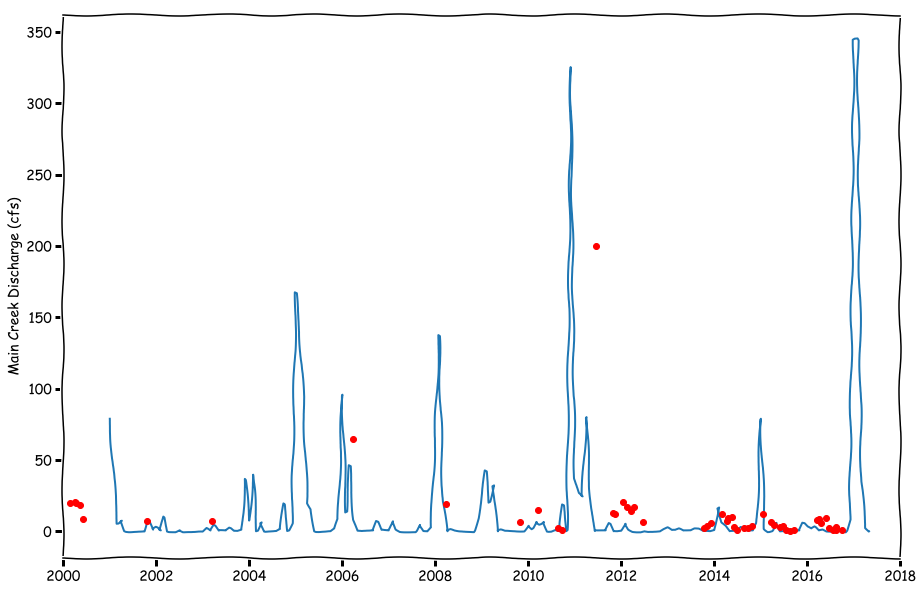

In [34]:
quer = "SELECT * FROM ubm.roundvalley9"

budget = pd.read_sql(sql = quer, con=engine)
budget['data'] = budget['raster_name'].apply(lambda x: str(x)[4:7],1)

budget.set_index('date',inplace=True)
budget['Water Year'] = budget.index.shift(-9,freq='M').year+1


def prisfix(df):
    if df['SOURCE']=='PRISM':
        df['volume_acft'] = df['MEAN']*df['AREA']*0.001*0.000810714
    else:
        pass
    return df


budget = budget.apply(prisfix,1)
budget.drop_duplicates(inplace=True)
budget.drop(['MEAN','COUNT','volume_m_cubed','AREA','SOURCE','YearMonth','Year','Month'],axis=1,inplace=True)
budget2 = budget[budget['name'].isin(['Bedrock','Valley Fill'])]
budget2.drop(['raster_name','datav','Water Year'],axis=1,inplace=True)
budg = budget2.groupby([budget2.index,budget2['data']]).sum()
budg = budg.unstack(level=1)
budg.columns = budg.columns.droplevel(0)
budg.rename(columns={"P20":"AVW"},inplace=True)
budg['asw_diff'] = budg['asw'].diff()
budg['balance'] = budg['AVW'] - budg['asw_diff'] - budg['aet'] - budg['rec'] - budg['run']
budg['run+rec'] = budg['rec'] + budg['run']
budg['Water Year'] = budg.index.shift(-9,freq='M').year+1
#budg['AVW2'] = budg['RAI'] + budg['SNM']
#budg['balance2'] = budg['AVW2'] - budg['asw_diff'] - budg['aet'] - budg['rec'] - budg['run']
budg['run+rec_cfs'] = budg['run+rec']*0.0165753

plt.figure()
x1 = budg['run+rec_cfs'].index
y1 = budg['run+rec_cfs']
plt.plot(x1,y1, label='UBM Calculation')


drive = 'G:/My Drive/WORK/'
fileplace = drive + 'Round_Valley/Data/Hydrology_Data/'
DEQ_long_flow = pd.read_excel(fileplace+'flow_check_wqp.xlsx','Sheet1')
DEQ_long_flow.set_index('datetime',inplace=True)
DEQ_long_flow.drop_duplicates(inplace=True)
x = DEQ_long_flow.index
y = DEQ_long_flow.Flow_cfs
y0 = y*60.3307
plt.scatter(x,y, label='DEQ Measurement', color='Red', zorder=10)
plt.ylabel('Main Creek Discharge (cfs)')
plt.xlim('1/1/2000','1/1/2018')
plt.grid()

In [37]:
budg.groupby('Water Year').sum().round(0).to_clipboard()

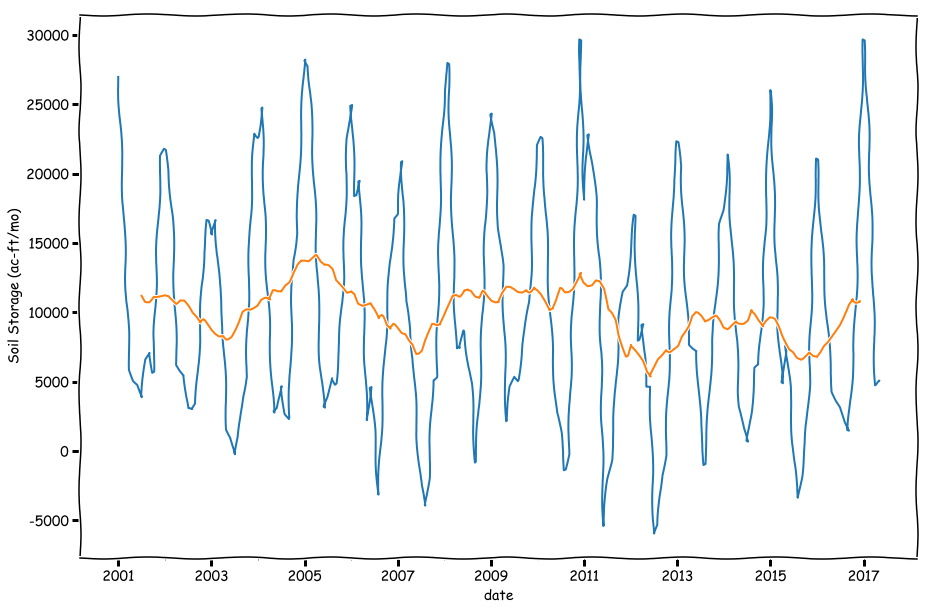

In [30]:
budg['asw'].plot()
budg['asw'].rolling(window=12, center=True).mean().plot()
plt.grid()
plt.ylabel('Soil Storage (ac-ft/mo)')


In [40]:
yrly = budget.groupby(['Water Year','name','data']).sum()

yrly = yrly.unstack(level=1)
yrly.columns = yrly.columns.droplevel()
yrly.drop(['160202030405','Res HUC'],axis=1, inplace=True)
yrly['Valley Total'] = yrly['Bedrock'] + yrly['Valley Fill']
for year in yrly.index.get_level_values(0):
    try:
        yrly.loc[(year,'rec+run'),:] = yrly.loc[(year,'run'),:] + yrly.loc[(year,'rec'),:]
        yrly.loc[(year,'AVW2'),:] = yrly.loc[(year,'RAI'),:] + yrly.loc[(year,'SNM'),:]
    except:
        pass
yrly.sort_index().to_clipboard()

In [39]:
moly = budget.groupby([budget.index,'name','data']).sum()

moly = moly.unstack(level=1)
moly.columns = moly.columns.droplevel()
moly.drop(['160202030405','Res HUC'],axis=1, inplace=True)
moly['Valley Total'] = yrly['Bedrock'] + yrly['Valley Fill']
#for mo in moly.index.get_level_values(0):
#    try:
#        moly.loc[(mo,'rec+run'),:] = moly.loc[(mo,'run'),:] + moly.loc[(mo,'rec'),:]
#    except:
#        pass
moly.sort_index().to_clipboard()

In [15]:
for year in yrly.index.get_level_values(0):
    yrly.loc[(year,'rec+run'),:] = yrly.loc[(year,'run'),:] + yrly.loc[(year,'rec'),:]

KeyError: (2000.0, 'run')

In [16]:
yrly.groupby('data').mean()

name,160202030402,160202030403,160202030404,Bedrock,Valley Fill,Valley Total
data,,,,,,
P20,19685.962444,41890.926862,22218.682520,61250.705749,23707.490619,84958.196369
aet,17953.941176,38019.941176,20448.941176,56250.352941,21190.823529,77441.176471
asw,29597.117647,65726.705882,21651.941176,105591.411765,11808.000000,117399.411765
rec,1868.058824,3483.647059,1735.882353,5461.000000,1744.705882,7205.705882
run,377.411765,1506.000000,622.529412,1253.352941,1305.823529,2559.176471
rec+run,2245.470588,4989.647059,2358.411765,6714.352941,3050.529412,9764.882353


## Wallsburg Sources


In [ ]:
header = ["Year", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul",
          "Aug", "Sep", "Oct", "Nov", "Dec", "Ann"]
block = """2017     4.3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0      4.3
2016     0.0     0.0     0.0     0.0     0.0     0.0    78.5     0.0     0.0     0.0     0.0     0.0     78.5
2015     0.0     0.0     0.0     0.0     0.0    76.7     0.0     0.0     0.0     0.0     0.0     0.0     76.7
2014     0.0     0.0     0.0     0.5     1.4     2.5     5.8     0.8     0.0     0.2     0.0     0.0     11.3
2013     0.5     1.2     0.8     0.9     1.1     1.0     1.3     0.4     0.3     0.3     0.0     0.0      7.7
2012     0.0     0.0     0.2     0.6     0.3     0.1     0.1     0.3     0.4     0.1     0.1     0.0      2.0
2011     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0      1.2
2010     0.0     0.0     0.0     0.0     2.3     1.9     3.9     2.7     0.3     0.2     0.1     0.0     11.4
2009     0.0     0.0     0.0     0.0     2.3     0.2     6.0     0.9     0.1     1.4     0.1     0.0     11.0
2001     0.0     0.0     0.0     0.0     0.1     5.0     3.8     0.3     2.3     0.1     0.0     0.0     11.7"""        
 

In [ ]:
from io import StringIO

In [ ]:
wallsburg_well = pd.read_table(StringIO(block),sep='\s+',names=header,index_col='Year')
wallsburg_well = wallsburg_well['Ann'].to_frame()

In [ ]:
wallsburg_well.columns = ['Wallsburg Well']

In [ ]:
wallsburg_well

In [ ]:
warmblock = """     2017    55.2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     55.2
     2016     6.1     1.9     1.9     1.9     6.1     6.1     6.1     6.1     6.1     6.1     6.1     6.1     60.6
     2015     0.0     0.0     0.0     0.0     3.1     0.3     9.2     0.9    30.7     0.0     0.0     0.0     44.2
     2014     1.8     1.9     2.2     1.9     4.3     7.2     4.0     0.5     5.6     3.4     3.3     2.5     38.7
     2013     1.6     1.3     1.1     2.0     5.8     6.8     6.7     6.8     5.7     1.5     1.4     1.8     42.5
     2012     2.0     2.0     2.6     3.1     7.0     9.6     8.4     8.1     5.5     0.8     5.0     2.2     56.2
     2011     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     44.6
     2010     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     35.7
     2009     2.8     2.6     2.9     2.7     2.9     5.7     4.1     7.1     5.3     1.7     2.5     2.5     42.8
     2001     2.7     2.7     2.7     2.7     3.0     4.7     5.6     6.4     3.1     2.7     2.7     2.7     41.7
     2000     2.7     2.7     2.7     2.7     4.7     4.7     6.3     6.3     2.9     2.9     2.7     2.7     44.1
     1999     2.7     2.7     2.7     2.7     4.9     4.9     6.1     6.1     3.0     3.0     2.7     2.7     44.4
     1998     2.8     2.8     2.8     2.8     4.4     4.4     5.9     5.9     2.9     2.9     2.8     2.8     42.9
     1997     2.9     2.9     2.9     2.9     2.7     2.7     5.4     5.4     2.5     2.5     2.9     2.9     38.6
     1991     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     38.1
     1990     1.7     1.7     1.7     1.7     4.3     4.3     6.4     6.4     3.4     3.4     1.7     1.7     38.1
     1989     1.6     1.6     1.6     1.6     7.6     7.6     9.4     9.4     4.5     4.5     1.6     1.6     52.8
     1988     1.6     1.6     1.6     1.6     5.4     5.4     6.0     6.0     3.0     3.0     1.6     1.6     38.3
     1987     1.6     1.6     1.6     1.6     5.2     5.2     5.6     5.6     3.6     3.6     1.6     1.6     38.4
     1986     1.6     1.6     1.6     1.6     4.5     4.5     5.5     5.5     2.9     2.9     1.6     1.6     35.2
     1982     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     22.3
     1981     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     25.8
     1980     1.1     1.1     1.2     1.2     1.5     3.3     3.0     2.7     1.4     1.3     1.2     0.9     19.9
     1979     2.0     2.1     2.5     3.7     4.0     4.0     4.0     4.3     3.7     2.5     2.1     2.0     36.8"""

In [ ]:
wallsburg_spring = pd.read_table(StringIO(warmblock),sep='\s+',names=header,index_col='Year')
wallsburg_spring = wallsburg_spring['Ann'].to_frame()

In [ ]:
wallsburg_spring.columns=['Warm Spring']

In [ ]:
wallsburgSources = pd.concat([wallsburg_spring,wallsburg_well],axis=1)

In [ ]:
wallsburgSources.to_clipboard()